In [2]:
# Import Libraries

# %matplotlib inline makes your plot outputs appear and be stored within the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # for plot styling
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,6)
import os

In [5]:
# Load Data Set

pd.set_option('display.width',5000)
os.chdir("C:\\Users\\HP\\Downloads\\Batch 93 Day41\\CS 37 Ans -Unsupervised Learning-1\\")
prajwal_data=pd.read_csv("driver-data.csv")
prajwal_data


,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [6]:
# Data Check

print (prajwal_data.info)
print('\n')
print(prajwal_data.describe())
print('\n')
print(prajwal_data.count())

<bound method DataFrame.info of               id  mean_dist_day  mean_over_speed_perc
0     3423311935          71.24                    28
1     3423313212          52.53                    25
2     3423313724          64.54                    27
3     3423311373          55.69                    22
4     3423310999          54.58                    25
...          ...            ...                   ...
3995  3423310685         160.04                    10
3996  3423312600         176.17                     5
3997  3423312921         170.91                    12
3998  3423313630         176.14                     5
3999  3423311533         168.03                     9

[4000 rows x 3 columns]>


                 id  mean_dist_day  mean_over_speed_perc
count  4.000000e+03    4000.000000           4000.000000
mean   3.423312e+09      76.041522             10.721000
std    1.154845e+03      53.469563             13.708543
min    3.423310e+09      15.520000              0.000000
25%    

In [7]:
# Check for NUll Values

print(prajwal_data.isnull().sum())
print(prajwal_data.notnull().sum())

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64
id                      4000
mean_dist_day           4000
mean_over_speed_perc    4000
dtype: int64


In [8]:
# Check for Record Count

print("Shape of Data:",prajwal_data.shape)

Shape of Data: (4000, 3)


In [9]:
# Create Independent Variable (X)

x=prajwal_data.iloc[:,[1,2]].values
x

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

In [10]:
# Elbow Method

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss    

[12184626.12962798,
 1316420.8509477177,
 1043390.7593597204,
 846858.6872650358,
 697900.357366852,
 514357.22877295886,
 319764.5198979895,
 297113.47299292946,
 272552.7439119015,
 238025.844087379]

Text(0, 0.5, 'wcss')

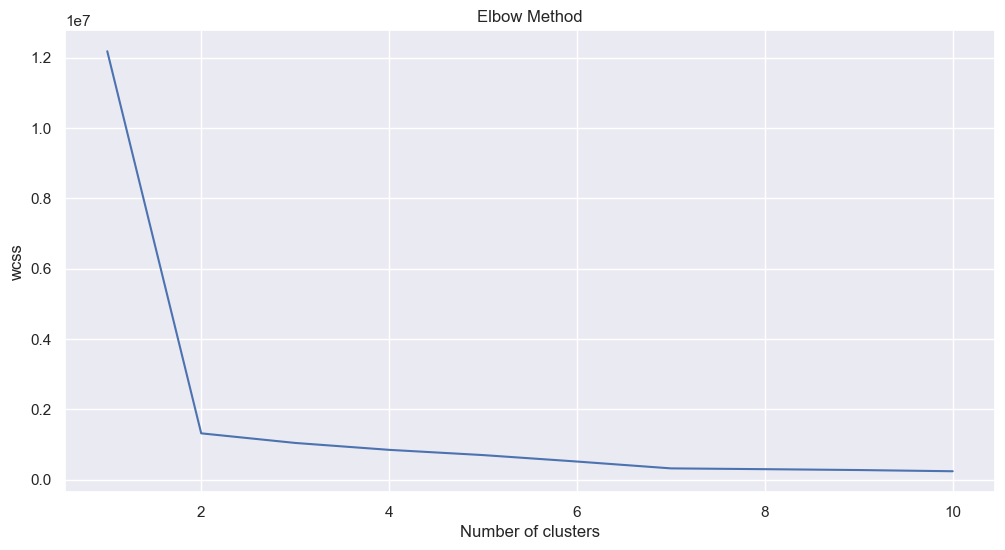

In [11]:
# Elbow Method Graph

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

In [12]:
# Model with two clusters

kmeans=KMeans(n_clusters=2)
prajwal_data_analyze=prajwal_data.drop('id',axis=1)
kmeans.fit(prajwal_data_analyze)

KMeans(n_clusters=2)

In [13]:
# Cluster Central Points

kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [ ]:
# Display Cluster Names

print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [15]:
# Record Count by cluster

print(type(kmeans.labels_))
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))


<class 'numpy.ndarray'>
{0: 3200, 1: 800}


In [20]:
size=6
height=6

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

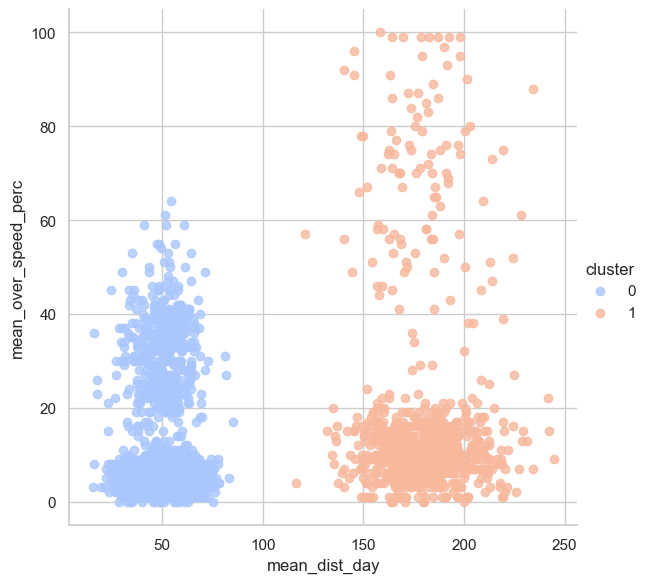

In [23]:
prajwal_data_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=prajwal_data_analyze, hue='cluster',
           palette='coolwarm', height=6, aspect=1, fit_reg=False)

In [24]:
# Create model with 4 clsuters

kmeans=KMeans(n_clusters=4,init='k-means++')
kmeans=kmeans.fit(x)
y_kmeans=kmeans.predict(x)
y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

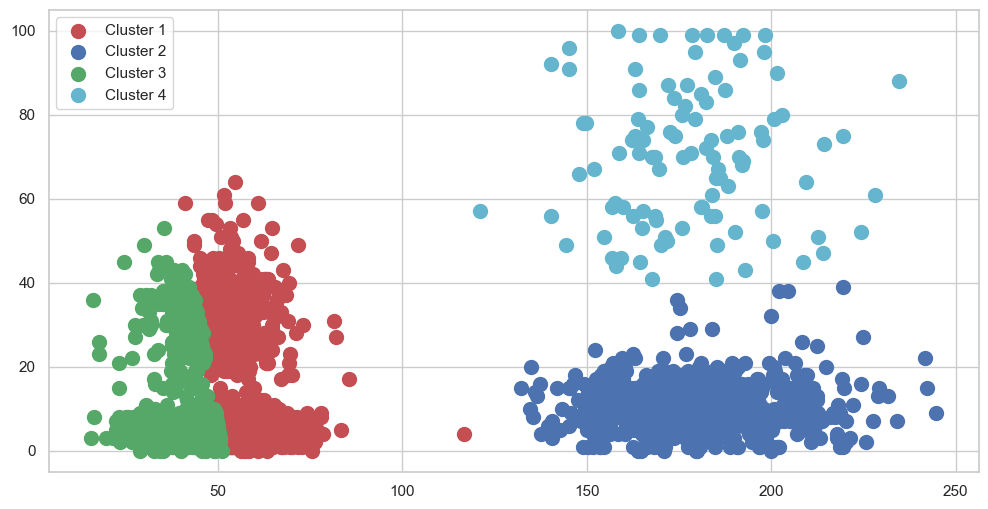

In [25]:
# Plot the graph

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='r',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='b',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='g',label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='c',label='Cluster 4')
plt.legend()

In [26]:
# Save the result as.xls

Final=pd.concat([prajwal_data,pd.DataFrame(y_kmeans,columns=['Cluster'])],axis=1)
Final.to_excel('Prajwal_Ghotkar.xlsx')
Final

,id,mean_dist_day,mean_over_speed_perc,Cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1
